In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [414]:
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [415]:
data.shape

(1030, 9)

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [417]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<span style='color:blue'> There are no null values or NAs in the dataset. 

In [418]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<span style= color:blue> Slag seems to right skewed, Ash has more than 50% of the data as zeros, age may have some outliers or right skewed. 
    

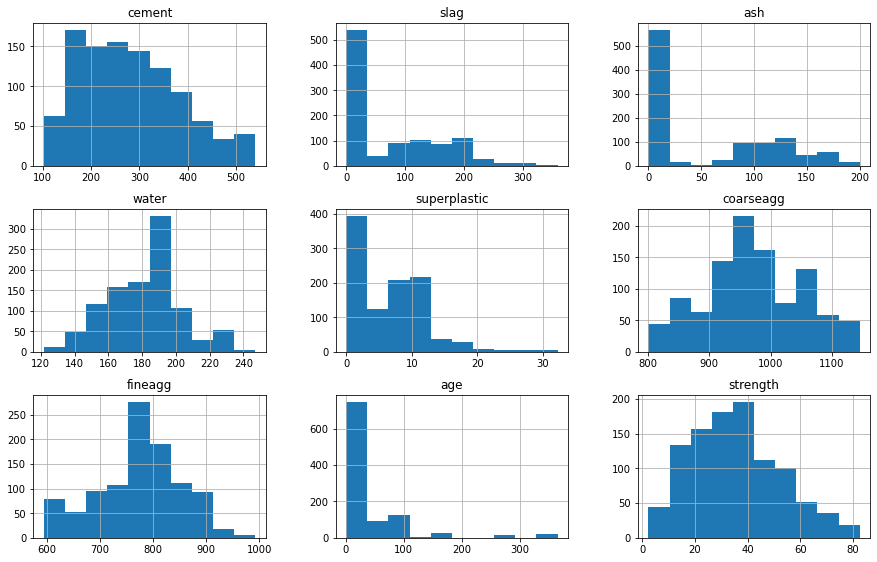

In [419]:
data.hist(figsize=(15,30),layout=(9,3));

<span style= color:blue> slag, ash, superplastic and age have a lot of zeros in the data. However, that seems realistic and will not be treated. 

In [420]:
data[data['slag']> 300]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
21,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7,21.92
285,203.5,305.3,0.0,203.5,0.0,963.4,630.0,90,51.86
405,203.5,305.3,0.0,203.5,0.0,963.4,630.0,28,41.68
516,203.5,305.3,0.0,203.5,0.0,963.4,630.0,7,19.54
564,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28,39.70
603,210.7,316.1,0.0,185.7,0.0,977.0,689.3,7,21.82
737,210.7,316.1,0.0,185.7,0.0,977.0,689.3,28,37.81
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56


In [421]:
data [data['age'] > 365]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [422]:
data [data['ash'] < 0]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


<span style= color:blue> The data doesn't have much outliers or negative numbers. The outliers seem very realistic and hence will not be treated. 
   

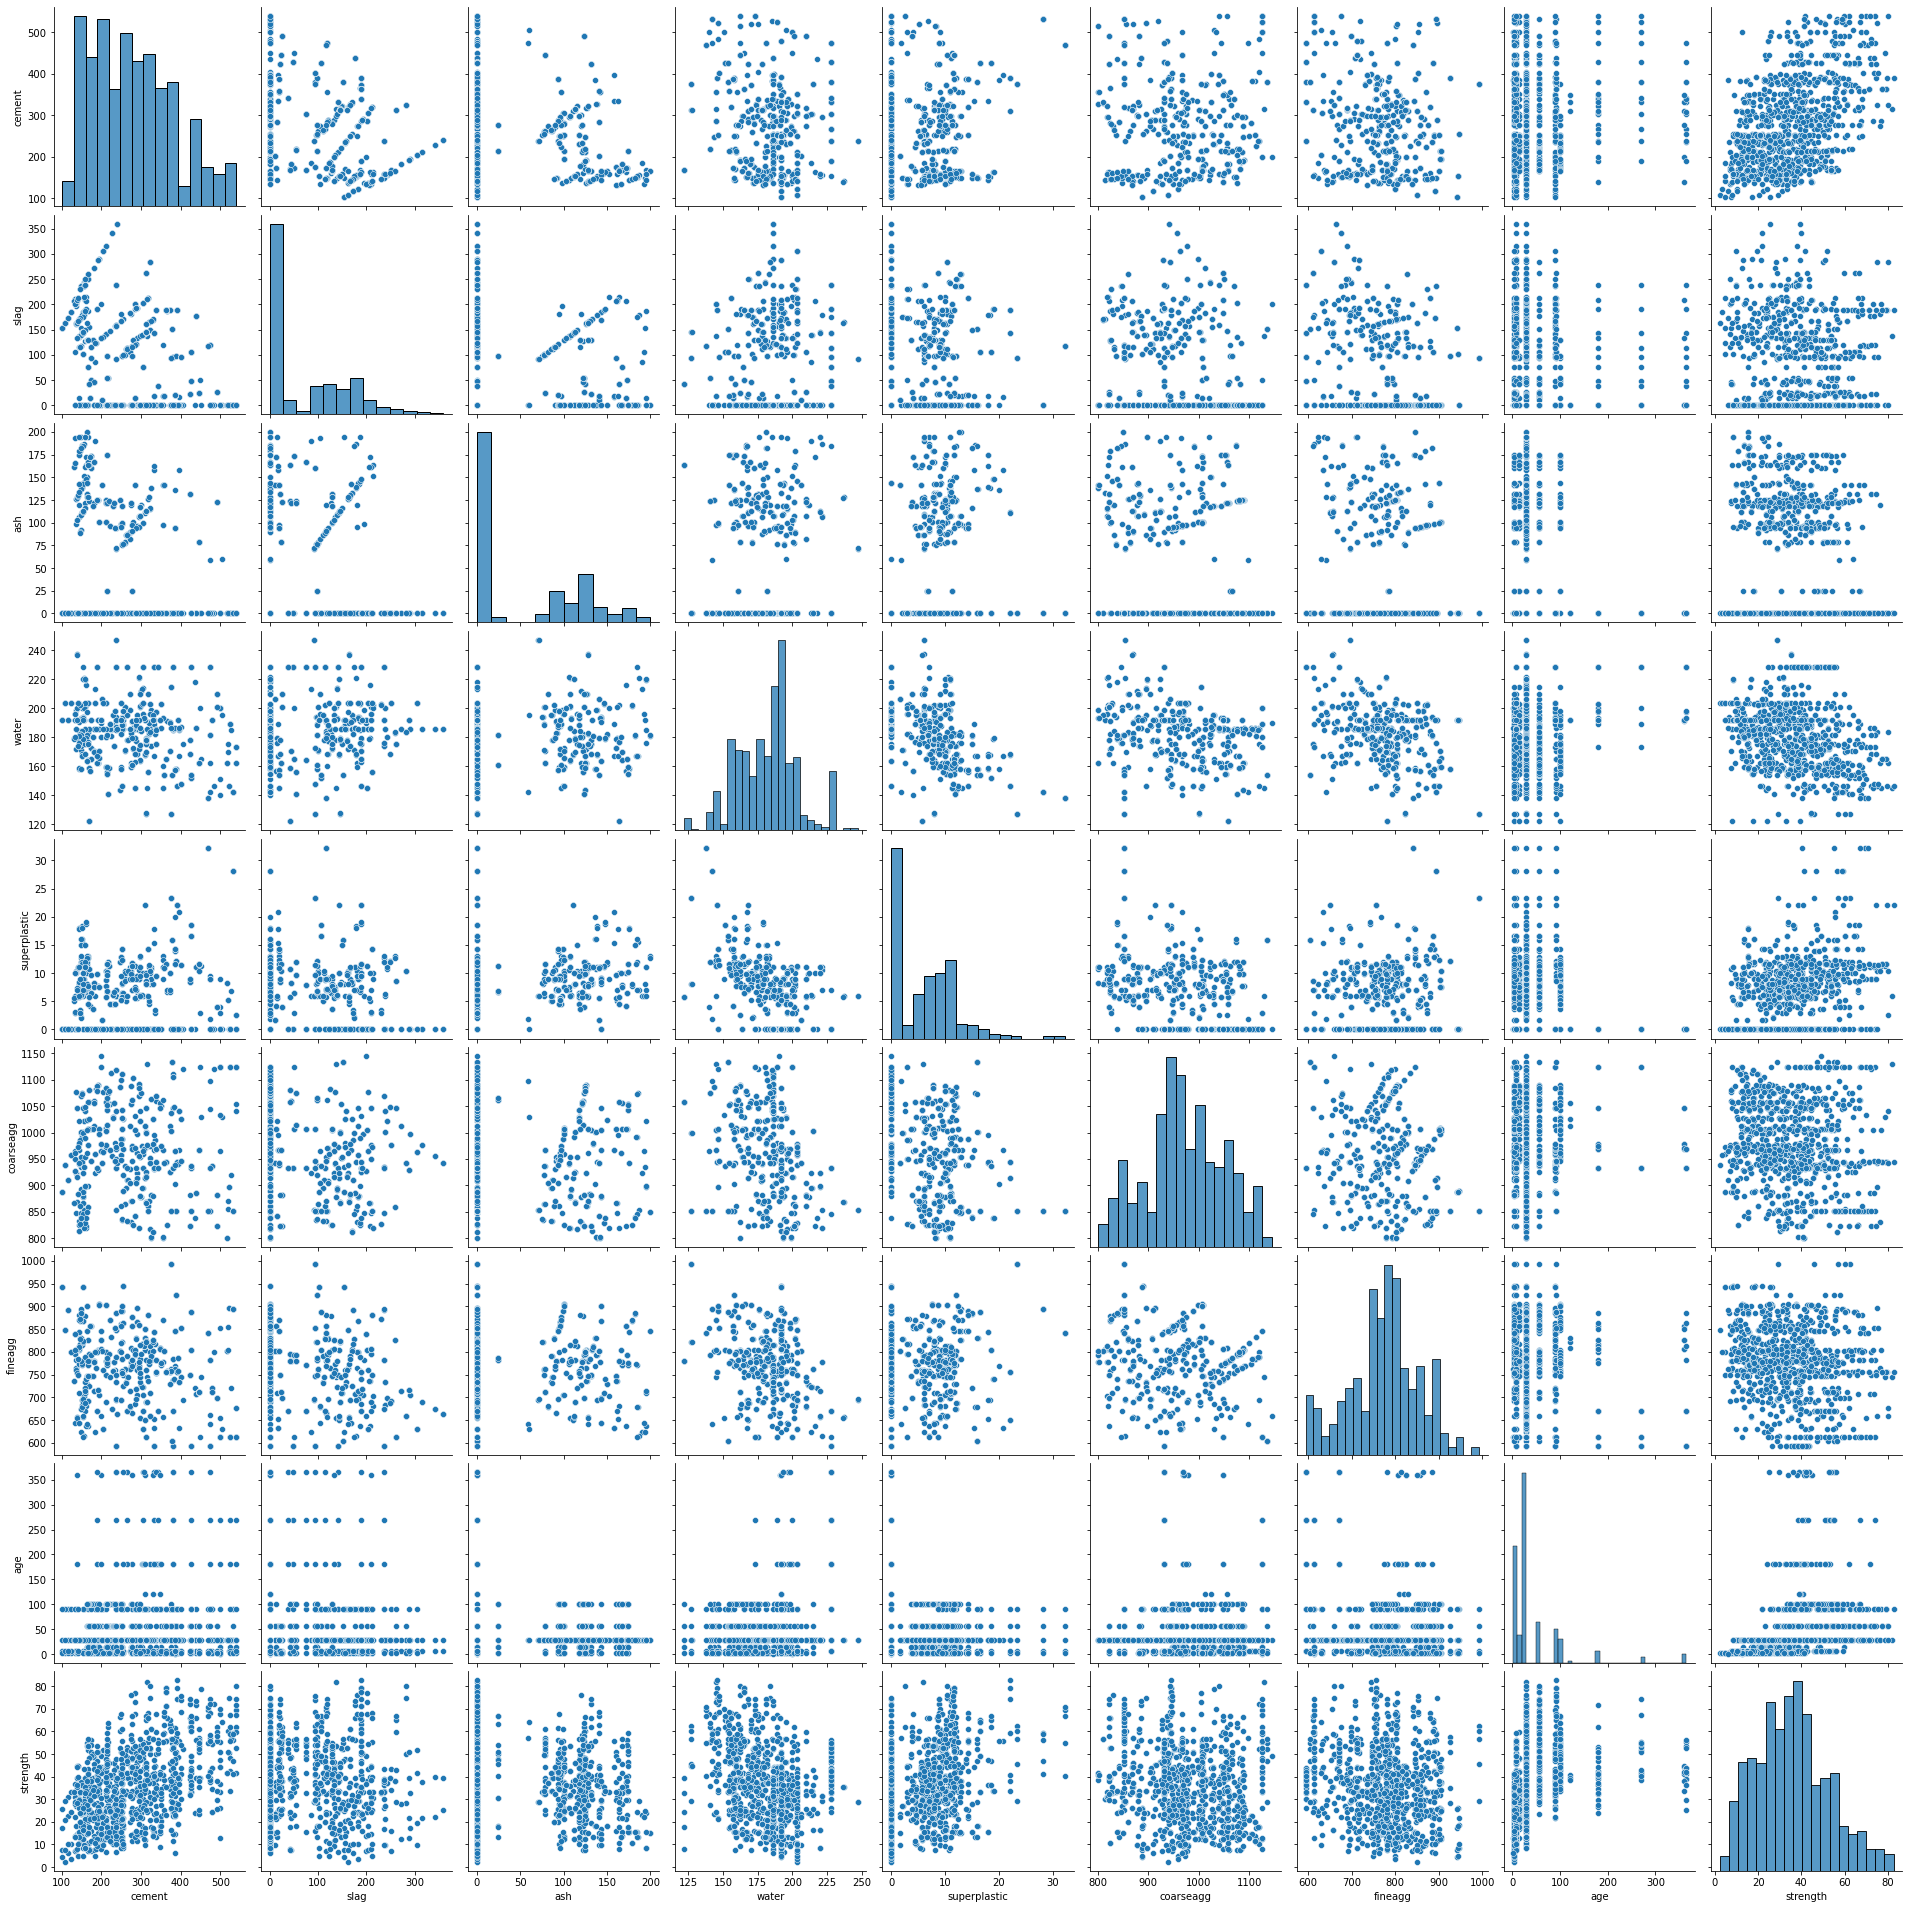

In [423]:
sns.pairplot(data, height=3, diag_kind='auto')
plt.show()

<span style= color:blue> No clear correlation between any variables. Cement seems to positively correlated and water negatively. 

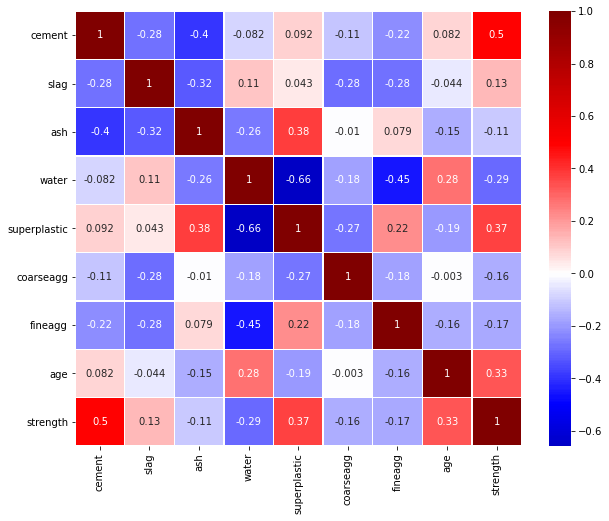

In [424]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="seismic")
plt.show()

<span style= color:blue> Highest positive correlation to strength is seen in cement and highest negative is seen in water

In [425]:
data['water-cement ratio'] = data['water'] / data['cement']

<span style= color:blue> Several research papers have shown water-cement ratio parameter as a primary predictor for the compressive 
strength. Hence creating a new feature. 

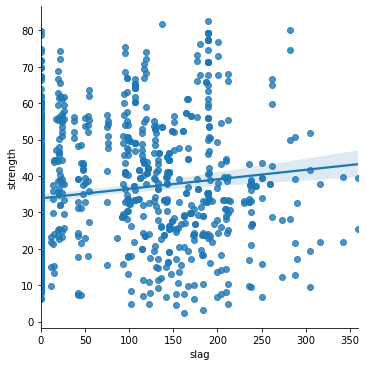

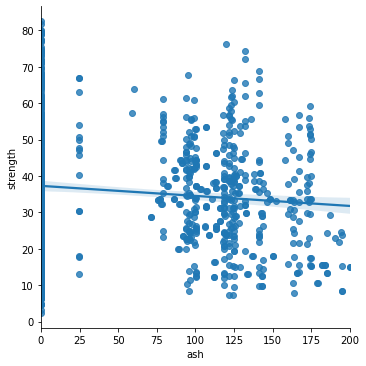

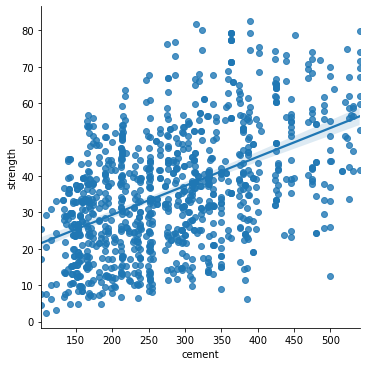

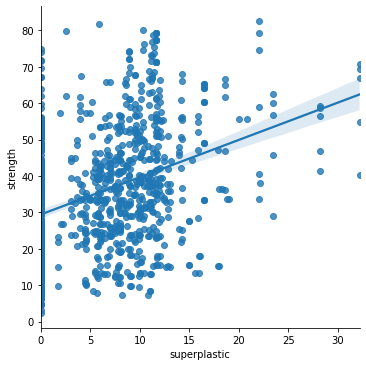

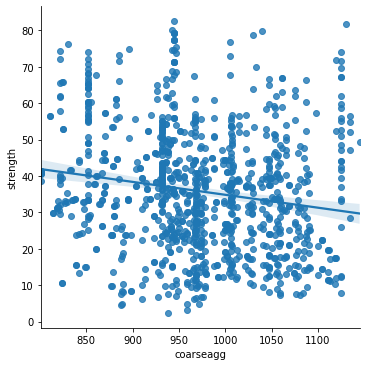

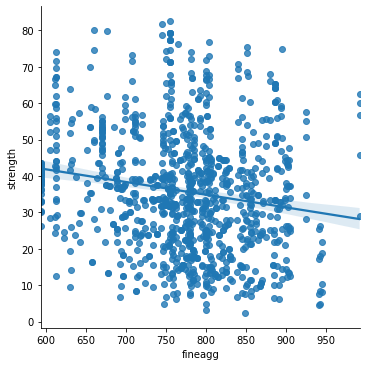

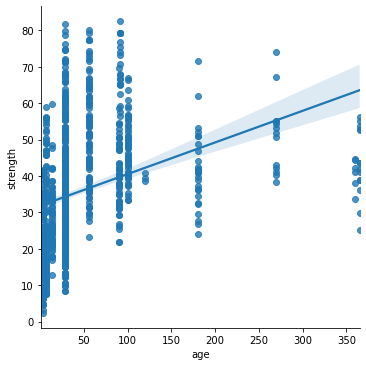

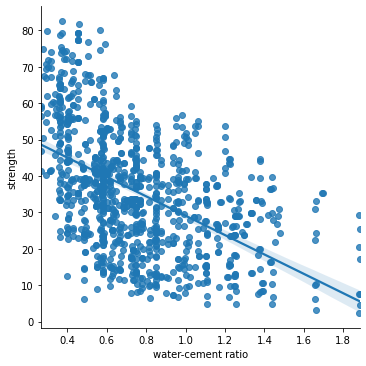

In [426]:
sns.lmplot(x= 'slag',y='strength',data= data)
sns.lmplot(x= 'ash',y='strength',data= data)
sns.lmplot(x= 'cement',y='strength',data= data)
sns.lmplot(x= 'superplastic',y='strength',data= data)
sns.lmplot(x= 'coarseagg',y='strength',data= data)
sns.lmplot(x= 'fineagg',y='strength',data= data)
sns.lmplot(x= 'age',y='strength',data= data)
sns.lmplot(x= 'water-cement ratio',y='strength',data= data)



<span style= color:blue> We can see that there is no clear relationship with any of the features with strength. 

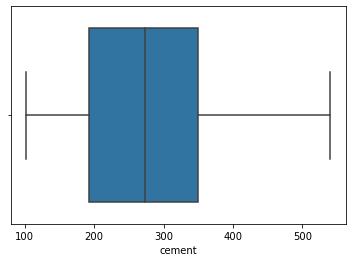

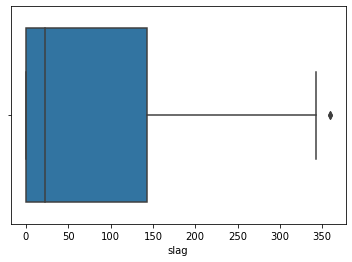

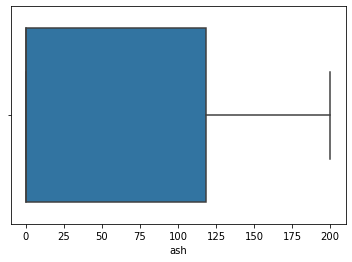

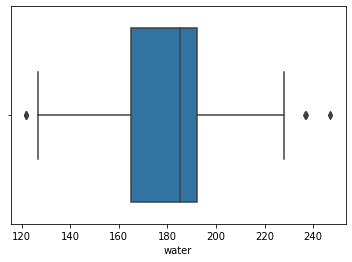

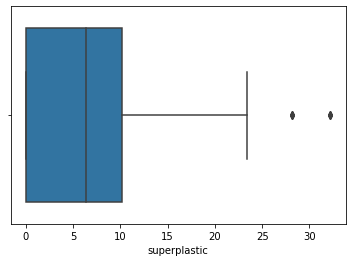

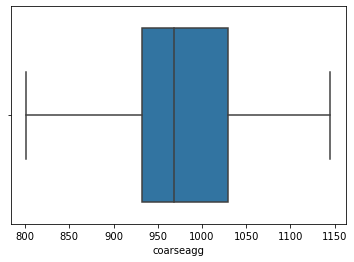

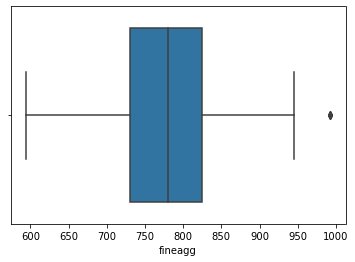

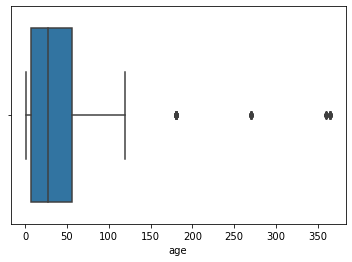

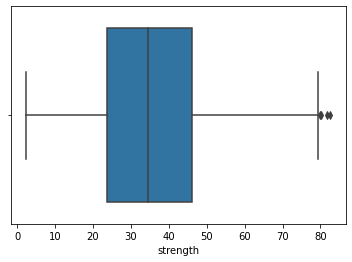

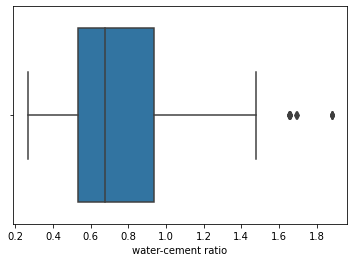

In [427]:
for i in data.columns:
    sns.boxplot (data[i])
    plt.show()

In [428]:
data[data['superplastic']>25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water-cement ratio
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2,0.266893
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4,0.266893
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3,0.293817
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7,0.293817
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9,0.266893
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9,0.293817
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9,0.293817
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8,0.266893
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2,0.293817
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3,0.266893


In [429]:
data[data['superplastic']==0].shape

(379, 10)

In [430]:
data[data['water-cement ratio']>1.8]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water-cement ratio
183,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68,1.882353
230,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33,1.879040
249,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23,1.879040
390,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,25.46,1.882353
407,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57,1.882353
417,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,17.28,1.882353
736,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59,1.879040
809,108.3,162.4,0.0,203.5,0.0,938.2,849.0,7,7.72,1.879040


<span style= color:blue>There are several outliers in the data but they all seem realistic in predicting the strength

In [431]:
X = data.drop('strength', axis =1 )
Y = data['strength']

In [432]:
#scaling the features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(df_norm, columns = X.columns)

In [433]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, 
                                                     test_size=0.3, random_state=1)

In [434]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

regression_model = LinearRegression()
regression_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [435]:
for counter, column_name in enumerate(X_train.columns):
    print ('The coefficient for {} is {}'.format(column_name, regression_model.coef_[counter]))

The coefficient for cement is 49.335478739112595
The coefficient for slag is 39.5901463857262
The coefficient for ash is 18.07066573271844
The coefficient for water is -10.606954233658916
The coefficient for superplastic is 11.938845700796332
The coefficient for coarseagg is 7.784767679805076
The coefficient for fineagg is 14.32313759337374
The coefficient for age is 39.94332848897199
The coefficient for water-cement ratio is -8.77489856423062


In [436]:
score1 = regression_model.score(X_test, y_test)
score1

0.6389112629965468

#### Polynomial features

In [437]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False )
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=1)
regression_model.fit(X_train, y_train)
score2 = regression_model.score(X_test, y_test)
score2

0.787592393257859

In [438]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=1)
regression_model.fit(X_train, y_train)
score3 = regression_model.score(X_test, y_test)
score3

0.789942847369499

<span style= color:blue> Adding polynomial degree 2 has improved the score by 15%. However, increasing it to degree 3 hasn't improved much. 

In [439]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True )
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.7465637954000772

<span style= color:blue> If 'interaction = True' was used, the improvedment is close to 10%. 

#### Cross validation

In [440]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [441]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(regression_model, X_norm, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
score4 = results.mean()

[0.47291959 0.67362612 0.70809336 0.5864892  0.54328895 0.68042842
 0.59932723 0.61707526 0.511799   0.54672301]
Accuracy: 59.398% (7.326%)


#### Ridge and Lasso regularization

In [443]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [444]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print (ridge.score(X_train, y_train))
print (ridge.score(X_test, y_test))
score5 = ridge.score(X_test, y_test)

0.7625314055545814
0.7459928718475357


In [449]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
print (lasso.score(X_train, y_train))
print (lasso.score(X_test, y_test))
score6=lasso.score(X_test, y_test)

0.7531985377469574
0.7520387515789055


#### Bagging

In [450]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor ( random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, 
                                                     test_size=0.3, random_state=1)
bag= bag.fit(X_train, y_train)
print (bag.score(X_train, y_train))
print (bag.score(X_test, y_test))
score7=bag.score(X_test, y_test)

0.9739891357215856
0.8971149734925287


In [452]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(bag, X_norm, Y, cv=kfold)
print(results)
print("Score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
score8 = results.mean()

[0.84743395 0.88351961 0.94734975 0.91030146 0.89075327 0.92220297
 0.93929474 0.91777742 0.90810356 0.92587254]
Score: 90.926% (2.775%)


#### Gradient boosting

In [454]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, 
                                                     test_size=0.3, random_state=1)
gradboost = gradboost.fit(X_train,y_train)
print (gradboost.score(X_train, y_train))
print (gradboost.score(X_test, y_test))
score9=gradboost.score(X_test, y_test)

0.9505047998057448
0.910883954522424


In [464]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(gradboost, X_norm, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
score10=results.mean()

[0.88099778 0.90514385 0.93810459 0.90880422 0.87619849 0.92170299
 0.93676708 0.92348861 0.91561645 0.90881986]
Accuracy: 91.156% (1.960%)


In [456]:
data = {'Technique' : ['Linear Regression', 'Linear Regression_polynomials_2', 
                       'Linear Regression_polynomials_3', 
                       'Linear Regression_CV', 'Ridge', 'Lasso', 'Bagging', 'Bagging_CV',
                       'GradientBoost', 'GradientBoost_CV'],
                    
       'Score' : [score1, score2, score3, score4, score5, score6, score7,score8, score9, score10, ] }

result = pd.DataFrame(data)
result

,Technique,Score
0,Linear Regression,0.638911
1,Linear Regression_polynomials_2,0.787592
2,Linear Regression_polynomials_3,0.789943
3,Linear Regression_CV,0.593977
4,Ridge,0.746416
5,Lasso,0.752039
6,Bagging,0.897115
7,Bagging_CV,0.909261
8,GradientBoost,0.910884
9,GradientBoost_CV,0.911564


### Hyperparameter tuning

#### Gradient Boost with Grid Search CV

In [457]:
param_grid = {'n_estimators':[30, 60, 100] ,
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3,4,5, 6],
              'min_samples_leaf':[1,2, 3, 5],
             }
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(gradboost,param_grid,cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [458]:
score11 = gs.score(X_test, y_test)

#### RandomSearchCV using Random Forest

In [313]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, 
                                                     test_size=0.3, random_state=1)
RF = RF.fit(X_train,y_train)
print (RF.score(X_train, y_train))
print (RF.score(X_test, y_test))
score12 = RF.score(X_test, y_test)

0.9776329854564573
0.8988355320346288


In [459]:
random_grid = {'bootstrap': [True, False],
               'max_depth': sp_randint (10,110),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': sp_randint (1, 5),
               'min_samples_split': sp_randint (2,10),
               'n_estimators': sp_randint (50, 250)}

rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


  n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,

In [460]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [461]:
print(rf_random.best_params_)
score13 = rf_random.score(X_test, y_test)

{'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 216}


In [462]:
data = {'Technique' : ['Linear Regression', 'Linear Regression_polynomials_2', 
                       'Linear Regression_polynomials_3', 
                       'Linear Regression_CV', 'Ridge', 'Lasso', 'Bagging', 'Bagging_CV',
                       'GradientBoost', 'GradientBoost_CV', 'GradientBoost_GridSearchCV', 'Random Forest', 'Random Forest_RandomSearchCV'],
                    
       'Score' : [score1, score2, score3, score4, score5, score6, score7,score8, score9, score10, score11, score12,
                 score13] }

result = pd.DataFrame(data)
result

,Technique,Score
0,Linear Regression,0.638911
1,Linear Regression_polynomials_2,0.787592
2,Linear Regression_polynomials_3,0.789943
3,Linear Regression_CV,0.593977
4,Ridge,0.746416
5,Lasso,0.752039
6,Bagging,0.897115
7,Bagging_CV,0.909261
8,GradientBoost,0.910884
9,GradientBoost_CV,0.911564


<span style='color:blue'> Adding the feature water/cement ratio did improve the score. 
Polynomial features with degree 2 increased the score by 15%. 
Finally, the grid and random search algorithms were used for tuning the hyper parameters and it improved the performance of the models by increasing the scores. 
    
<span style='color:Dark Green'> Using feature engineering, several regression models and hyper parameter tuning, we can estimate the strength of the cement with accuracy as high as 92%. 
